In [16]:
import numpy as np
import pandas as pd
import networkx as nx

In [3]:
np.random.seed(5)

In [4]:
# Now we want to create a couple of graphs. In practice, we start setting the number of nodes for each graph.

length_s = 10
length_t = 20

# For each couple of nodes in a graph we generate a random natural number between 0 and 100.

matrix_s = np.zeros((length_s, length_s))
matrix_t = np.zeros((length_t, length_t))


# We also want our graphs to be representative of reality (i.e. graphs are usually sparse).

for i in range(length_s):
    for j in range(i):
        rnd = np.random.randint(1, 101)
        unif = np.random.rand()
        if unif > 0.6:
            matrix_s[i][j] = rnd
            matrix_s[j][i] = rnd
        else:
            matrix_s[i][j] = 0
            matrix_s[j][i] = 0


for i in range(length_s):
    for j in range(i):
        rnd = np.random.randint(1, 101)
        unif = np.random.rand()
        if unif > 0.6:
            matrix_t[i][j] = rnd
            matrix_t[j][i] = rnd
        else:
            matrix_t[i][j] = 0
            matrix_t[j][i] = 0



print(matrix_s)
print("\n")
print(matrix_t)

[[ 0.  0.  0. 63. 54.  0.  5. 68. 17.  0.]
 [ 0.  0. 17.  0.  0.  0.  0. 56. 46. 45.]
 [ 0. 17.  0.  0. 76. 63.  0. 79.  0. 95.]
 [63.  0.  0.  0.  0.  0.  0. 34.  0. 23.]
 [54.  0. 76.  0.  0.  0.  8.  8.  0.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0. 48.  0.]
 [ 5.  0.  0.  0.  8.  0.  0.  0.  0.  0.]
 [68. 56. 79. 34.  8.  0.  0.  0.  0. 71.]
 [17. 46.  0.  0.  0. 48.  0.  0.  0.  0.]
 [ 0. 45. 95. 23.  0.  0.  0. 71.  0.  0.]]


[[ 0.  0. 14. 23.  0.  0.  0. 88. 92.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. 93.  0. 58. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [14.  0.  0.  0.  0.  0. 70.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [23. 93.  0.  0.  0.  0.  0. 65.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0. 58.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 58.  0.  0.  0.  0.  0. 24. 83. 95.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 33. 70.  0.  0.  0.  0. 69.  0. 29.  0.  0.  0.  0.

In [5]:
# Now we want to give a weight to each node in each matrix. In particulare if a node has a lot of connections, it should have a weight which is linear wrt the sum of its edges.

M_s = []
M_t = []

for i in range(length_s):
    s = sum(matrix_s[i,:])
    M_s.append(s)
M_s = M_s/sum(M_s)


for i in range(length_t):
    s = sum(matrix_t[i,:])
    M_t.append(s)
M_t = M_t/sum(M_t)


print(M_s)
print("\n")
print(M_t)

[0.11815068 0.09360731 0.18835616 0.06849315 0.08333333 0.06335616
 0.00742009 0.1803653  0.06335616 0.13356164]


[0.12109375 0.10267857 0.046875   0.10100446 0.03348214 0.14508929
 0.11216518 0.13839286 0.09765625 0.1015625  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [6]:
# This are matrices which represent the similitude between nodes.

C_s = 1/(1 + matrix_s)

C_t = 1/(1 + matrix_t)

print(matrix_s)
print("\n")
print(matrix_t)

[[ 0.  0.  0. 63. 54.  0.  5. 68. 17.  0.]
 [ 0.  0. 17.  0.  0.  0.  0. 56. 46. 45.]
 [ 0. 17.  0.  0. 76. 63.  0. 79.  0. 95.]
 [63.  0.  0.  0.  0.  0.  0. 34.  0. 23.]
 [54.  0. 76.  0.  0.  0.  8.  8.  0.  0.]
 [ 0.  0. 63.  0.  0.  0.  0.  0. 48.  0.]
 [ 5.  0.  0.  0.  8.  0.  0.  0.  0.  0.]
 [68. 56. 79. 34.  8.  0.  0.  0.  0. 71.]
 [17. 46.  0.  0.  0. 48.  0.  0.  0.  0.]
 [ 0. 45. 95. 23.  0.  0.  0. 71.  0.  0.]]


[[ 0.  0. 14. 23.  0.  0.  0. 88. 92.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. 93.  0. 58. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [14.  0.  0.  0.  0.  0. 70.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [23. 93.  0.  0.  0.  0.  0. 65.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0. 58.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 58.  0.  0.  0.  0.  0. 24. 83. 95.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 33. 70.  0.  0.  0.  0. 69.  0. 29.  0.  0.  0.  0.

In [7]:
d = 3
beta = 0.5
gamma = 0.5
inner_n = 50
outer_n = 80

In [8]:
OT = np.outer(M_s, M_t)
correspondence = OT.copy()
print(OT)

for i in range(length_s):
    for j in range(length_t):
        if correspondence[i][j] == max(OT[i,:]):
            correspondence[i][j] = 1
        else:
            correspondence[i][j] = 0

correspondence

[[0.01430731 0.01213154 0.00553831 0.01193375 0.00395594 0.0171424
  0.01325239 0.01635121 0.01153815 0.01199968 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.01133526 0.00961146 0.00438784 0.00945476 0.00313417 0.01358142
  0.01049948 0.01295458 0.00914134 0.00950699 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.02280875 0.01934014 0.0088292  0.01902481 0.00630657 0.02732846
  0.021127   0.02606715 0.01839416 0.01912992 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.00829409 0.00703278 0.00321062 0.00691811 0.0022933  0.00993762
  0.00768255 0.00947896 0.00668878 0.00695634 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.01009115 0.00855655 0.00390625 0.00841704 0.00279018 0.01209077
  0.0093471  0.01153274 0.00813802 0.00846354 0.         0.
  0.         0.      

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [9]:
lambda_reg = 0.001

In [10]:
def GWL_simple(C_s, C_t, M_s, M_t, beta, gamma, d, inner_n, outer_n, lambda_reg):
    """
    Simplified Gromov-Wasserstein Learning (GWL) with entropy-regularized cost, embedding updates,
    and regularization R(X_s, X_t).
    
    Parameters:
    - C_s: Cost matrix for source graph (length_s x length_s). 
    - C_t: Cost matrix for target graph (length_t x length_t).
    - M_s: Marginal distribution for source graph (length_s,).
    - M_t: Marginal distribution for target graph (length_t,).
    - beta: Regularization parameter for Sinkhorn iterations.
    - gamma: Regularization parameter for entropy term.
    - alpha: Weight for embedding-level cost regularization.
    - d: Dimension of the embeddings.
    - inner_n: Number of inner Sinkhorn iterations.
    - outer_n: Number of outer embedding updates.
    - lambda_reg: Regularization weight for R(X_s, X_t).
    """
    length_s, length_t = C_s.shape[0], C_t.shape[0]

    # Initialize embeddings
    embed_s = np.random.rand(d, length_s) * 5
    embed_t = np.random.rand(d, length_t) * 5

    # Initialize transport matrix
    T = np.outer(M_s, M_t)

    for m in range(outer_n):
        alpha_m = m / outer_n  # Gradual interpolation weight

        # Inner loop: Update transport matrix T using entropy regularization
        for n in range(inner_n):
            # Compute embedding-level cost
            K_embed = np.zeros((length_s, length_t))
            for i in range(length_s):
                for j in range(length_t):
                    K_embed[i, j] = np.sum((embed_s[:, i] - embed_t[:, j]) ** 2)

            # Compute graph-level cost
            graph_cost = C_s @ T @ C_t.T
            C_mn = graph_cost + alpha_m * K_embed + gamma

            # Add entropy regularization term
            C_reg = C_mn - gamma * np.log(T + 1e-8)
            
            # Sinkhorn update
            kernel = np.exp(-C_reg / beta)
            a = np.ones(length_s)
            for _ in range(inner_n):
                b = M_t / (kernel.T @ a)
                a = M_s / (kernel @ b)

            T = np.diag(a) @ kernel @ np.diag(b)

        # Update embeddings by minimizing α_m <K(X_s, X_t), T> + β R(X_s, X_t)
        for _ in range(10):  # Gradient descent steps
            # Compute gradients of K(X_s, X_t)
            grad_s = np.zeros_like(embed_s)
            grad_t = np.zeros_like(embed_t)
            for i in range(length_s):
                for j in range(length_t):
                    grad_s[:, i] += 2 * T[i, j] * (embed_s[:, i] - embed_t[:, j])
                    grad_t[:, j] += 2 * T[i, j] * (embed_t[:, j] - embed_s[:, i])

            # Add gradients of R(X_s, X_t)
            for i in range(length_s):
                for j in range(length_s):
                    grad_s[:, i] += lambda_reg * 4 * ((np.sum((embed_s[:, i] - embed_s[:, j]) ** 2) - C_s[i, j]) *
                                                      (embed_s[:, i] - embed_s[:, j]))

            for i in range(length_t):
                for j in range(length_t):
                    grad_t[:, i] += lambda_reg * 4 * ((np.sum((embed_t[:, i] - embed_t[:, j]) ** 2) - C_t[i, j]) *
                                                      (embed_t[:, i] - embed_t[:, j]))

            # Gradient descent step
            embed_s -= alpha_m * grad_s
            embed_t -= alpha_m * grad_t

    # Compute final loss
    final_cost = np.sum(T * C_mn)
    entropy = -np.sum(T * np.log(T + 1e-8))
    total_loss = final_cost - gamma * entropy

    # Graph matching
    correspondence = np.zeros_like(T)
    for i in range(length_s):
        max_idx = np.argmax(T[i, :])
        correspondence[i, max_idx] = 1

    return embed_s, embed_t, T, correspondence, total_loss


In [11]:
embed_s, embed_t, OT, correspondence, total_loss = GWL_simple(C_s, C_t, M_s, M_t, beta, gamma, d, inner_n, outer_n, lambda_reg)

In [12]:
embed_t

array([[2.16371909, 2.78243604, 2.36014883, 2.3491374 , 2.41712638,
        2.20542718, 2.24400453, 2.80650417, 2.16483409, 2.77987976,
        2.55368424, 2.65284937, 3.13277809, 2.78419772, 2.9690229 ,
        2.8803748 , 3.03032757, 2.27144344, 3.2512785 , 2.96667824],
       [2.47138845, 2.18260137, 1.9326747 , 1.97008452, 1.90818207,
        2.42060206, 2.20936543, 2.201796  , 2.46569259, 2.17845651,
        2.7967007 , 2.49056508, 2.06313736, 2.65510932, 2.92136899,
        2.21581672, 2.87427913, 2.87410091, 2.14209232, 2.95415741],
       [2.79845983, 3.01060079, 2.57280898, 2.61109012, 2.58973761,
        2.80782116, 2.72968815, 3.02031924, 2.80125317, 3.00874521,
        2.05761043, 1.91890153, 2.25586912, 1.99675973, 2.80519674,
        1.97725606, 2.81126392, 2.27353835, 2.45344755, 2.70262038]])

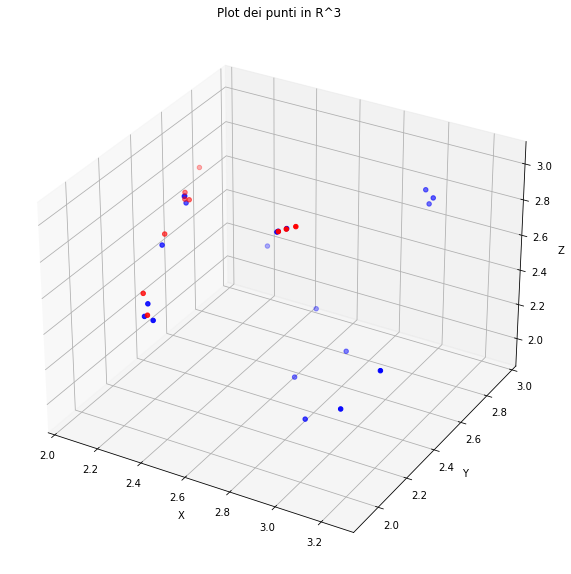

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generiamo una matrice casuale 3x30
matrix = embed_s

# Creiamo un plot in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Estrarre le coordinate dei punti
x = matrix[0, :]
y = matrix[1, :]
z = matrix[2, :]

# Scatter plot dei punti
ax.scatter(x, y, z, color='r',marker='o')

x2=embed_t[0,:]
y2 = embed_t[1,:]
z2 = embed_t[2,:]
ax.scatter(x2,y2,z2, color='b',marker='o')



# Etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Titolo
ax.set_title('Plot dei punti in R^3')

plt.show()

In [14]:
import numpy as np
import plotly.graph_objects as go

# Etichette per embed_s e embed_t
labels_s = [f'S{i}' for i in range(embed_s.shape[1])]
labels_t = [f'T{i}' for i in range(embed_t.shape[1])]

# Creiamo il grafico scatter interattivo
fig = go.Figure()

# Aggiungi i punti della prima matrice (embed_s) in rosso
fig.add_trace(go.Scatter3d(
    x=embed_s[0, :],
    y=embed_s[1, :],
    z=embed_s[2, :],
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=labels_s,  # Etichette per ogni punto
    textposition='top center',
    name='embed_s'
))

# Aggiungi i punti della seconda matrice (embed_t) in blu
#fig.add_trace(go.Scatter3d(
    #x=embed_t[0, :],
    #y=embed_t[1, :],
    #z=embed_t[2, :],
    #mode='markers+text',
    #marker=dict(size=5, color='blue'),
    #text=labels_t,  # Etichette per ogni punto
    #textposition='top center',
    #name='embed_t'
#))

# Personalizzazione del layout
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Mostra il grafico
fig.show()


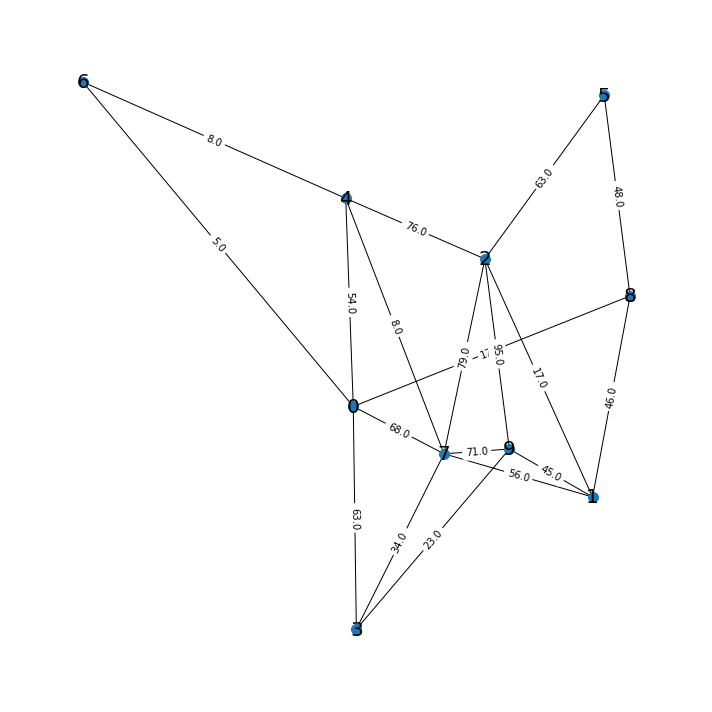

In [25]:
G=nx.from_numpy_array(matrix_s)
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility


f=plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, width=1)


# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [32]:
nx.adjacency_matrix(G)

/var/folders/gd/b2d40bms7s3f8y4f31x7pk1r0000gn/T/ipykernel_9749/915424627.py:1: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [18]:
matrix_s

array([[ 0.,  0.,  0., 63., 54.,  0.,  5., 68., 17.,  0.],
       [ 0.,  0., 17.,  0.,  0.,  0.,  0., 56., 46., 45.],
       [ 0., 17.,  0.,  0., 76., 63.,  0., 79.,  0., 95.],
       [63.,  0.,  0.,  0.,  0.,  0.,  0., 34.,  0., 23.],
       [54.,  0., 76.,  0.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  0., 63.,  0.,  0.,  0.,  0.,  0., 48.,  0.],
       [ 5.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.],
       [68., 56., 79., 34.,  8.,  0.,  0.,  0.,  0., 71.],
       [17., 46.,  0.,  0.,  0., 48.,  0.,  0.,  0.,  0.],
       [ 0., 45., 95., 23.,  0.,  0.,  0., 71.,  0.,  0.]])